In [21]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# code_path = Path(__file__)
code_path = Path(r'C:\Users\tianc\OneDrive\Documents\SIG\DISES\code\MPI')
datafd_path = code_path.parent.parent / 'data' / 'MPI' 
outfd_path = code_path.parent.parent / 'output'

### cluster-level MPI based on Cambodia DHS 2014 with SE, CI and missingness info

In [5]:
spatial_res = 'clust'
df = pd.read_csv(outfd_path / 'data' / f'mpi_khm_dhs14_{spatial_res}_CI_mis.csv')

#### explore missingness

(array([  4.,  22.,  60., 116., 133., 140.,  79.,  32.,  16.,   9.]),
 array([ 44. ,  51.2,  58.4,  65.6,  72.8,  80. ,  87.2,  94.4, 101.6,
        108.8, 116. ]),
 <BarContainer object of 10 artists>)

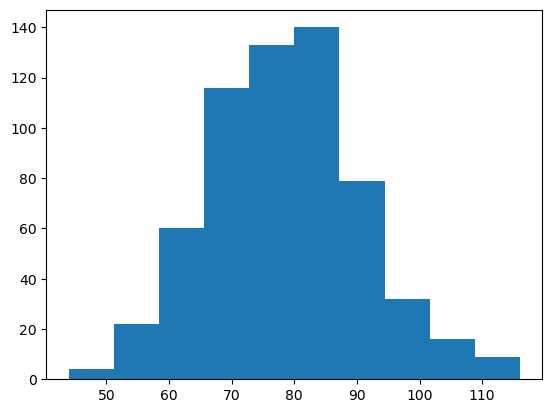

In [7]:
plt.hist(df.tot_samp_ppl)  # number of people sampled in each cluster

In [8]:
df.tot_samp_ppl.min()  # at least 44

44

(array([440.,  61.,  60.,  26.,  14.,   6.,   3.,   0.,   0.,   1.]),
 array([ 0.        ,  3.10344815,  6.20689631,  9.31034446, 12.41379261,
        15.51724076, 18.62068892, 21.72413707, 24.82758522, 27.93103337,
        31.03448153]),
 <BarContainer object of 10 artists>)

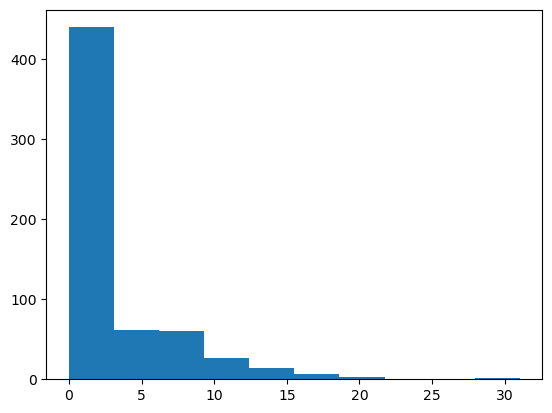

In [9]:
plt.hist(df.ppt_samp_ppl_mis)  # percent sampled people with missing data
# not used in MPI / CI calculation

In [10]:
df.pct_samp_ppl_mis.max()  # as much as 30% missing

31.034481525421143

44.0


(array([  9.,  21.,  74., 120., 122., 129.,  72.,  37.,  21.,   6.]),
 array([ 44.,  51.,  58.,  65.,  72.,  79.,  86.,  93., 100., 107., 114.]),
 <BarContainer object of 10 artists>)

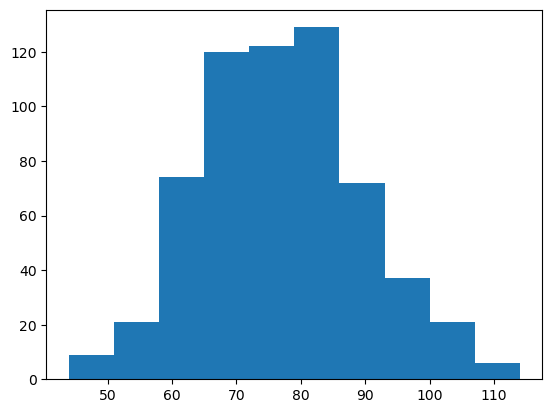

In [13]:
# number of people with complete info, thus used to calculate MPI & CI
n_ppl_no_mis_s = df.tot_samp_ppl * (100 - df.ppt_samp_ppl_mis) / 100
print(n_ppl_no_mis_s.min())  # at least 44
plt.hist(n_ppl_no_mis_s)

#### explore SE & CI

In [22]:
CV_s = df.mpi_SE / df.mpi  # coef. of variation

In [23]:
np.sort(CV_s)

array([0.05020808, 0.06361991, 0.06448875, 0.08226161, 0.08492527,
       0.0875925 , 0.101562  , 0.10851287, 0.10921308, 0.11478729,
       0.11551205, 0.11602241, 0.11723982, 0.11729779, 0.11757745,
       0.1186575 , 0.11995696, 0.12540495, 0.12628946, 0.12663086,
       0.12674299, 0.12690005, 0.13171603, 0.1322521 , 0.13255657,
       0.1335332 , 0.13402962, 0.13420948, 0.13495533, 0.13509071,
       0.13559609, 0.13728592, 0.13846054, 0.1389101 , 0.13905157,
       0.14023076, 0.14044954, 0.14103899, 0.14313372, 0.14330686,
       0.14406632, 0.14476012, 0.14809263, 0.14922679, 0.15003661,
       0.15049431, 0.15183321, 0.15233812, 0.15463621, 0.15495031,
       0.15720057, 0.1573923 , 0.16023378, 0.16056965, 0.16345517,
       0.16350871, 0.16423004, 0.16496551, 0.16625604, 0.17165062,
       0.17315105, 0.17453074, 0.1759266 , 0.17735148, 0.17868979,
       0.17882914, 0.17933333, 0.17939624, 0.18247538, 0.18286012,
       0.18291457, 0.18404288, 0.18432504, 0.18437324, 0.18444

(array([ 46., 103., 108.,  74.,  45.,  35.,  38.,  11.,   8.,  57.]),
 array([0.05020808, 0.15125029, 0.2522925 , 0.3533347 , 0.45437691,
        0.55541912, 0.65646133, 0.75750354, 0.85854574, 0.95958795,
        1.06063016]),
 <BarContainer object of 10 artists>)

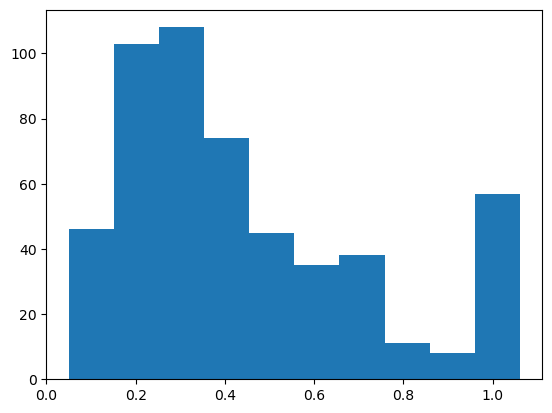

In [15]:
plt.hist(CV_s)

(0.0, 612.0)

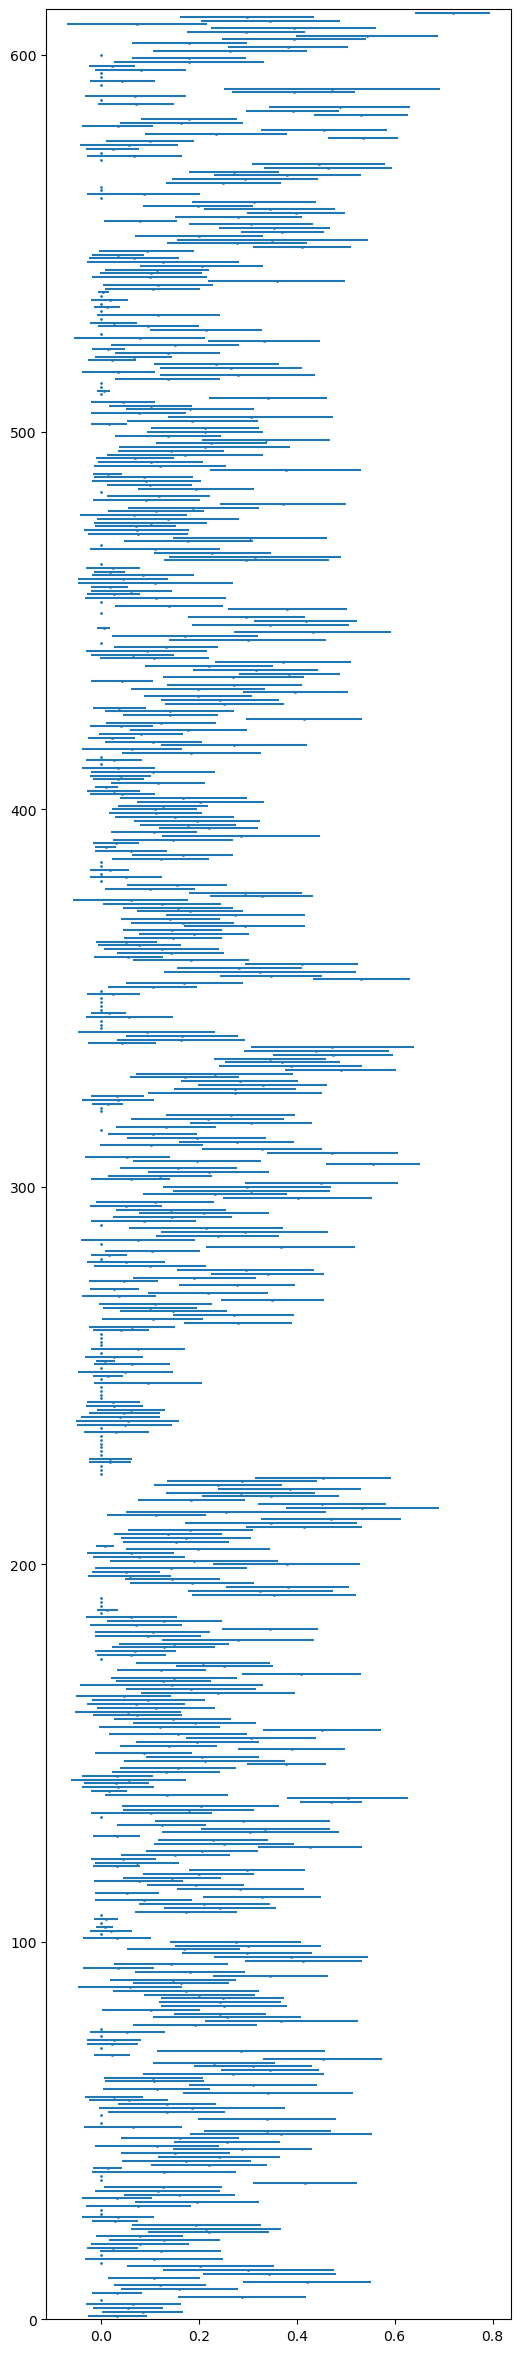

In [63]:
plt.figure(figsize=(6,30))
n_clust = df.shape[0]
plt.scatter(data=df[:n_clust], x='mpi', y='clust_no', s=1)
plt.hlines(data=df[:n_clust],
           y='clust_no', xmin='mpi_lo95CI', xmax='mpi_up95CI')
plt.ylim(0, n_clust+1)

##### provincial SE & CI

In [67]:
path = datafd_path / 'excels' / 'Table-5-Subnational-Results-MPI-2021-eda.xlsx'
rgn_df = pd.read_excel(path, sheet_name='mpi_khm_dhs14_rgn_CI')

In [87]:
rgn_df

,region_name,mpi,mpi_SE,mpi_lo95CI,mpi_up95CI
0,Banteay Meanchay,0.137199,0.019363,0.099167,0.175231
1,Battambang & Pailin,0.114760,0.021137,0.073245,0.156276
2,Kampong Cham,0.195211,0.022676,0.150673,0.239749
3,Kampong Chhnang,0.224071,0.020997,0.182830,0.265311
4,Kampong Speu,0.187270,0.022155,0.143755,0.230785
5,Kampong Thom,0.216589,0.024835,0.167811,0.265367
6,Kampot & Kep,0.169327,0.019605,0.130821,0.207833
7,Kandal,0.144739,0.019114,0.107196,0.182282
8,Kratie,0.300186,0.030758,0.239774,0.360598
9,Mondul Kiri and Ratanak Kiri,0.290033,0.040022,0.211426,0.368640


(-0.1, 0.85)

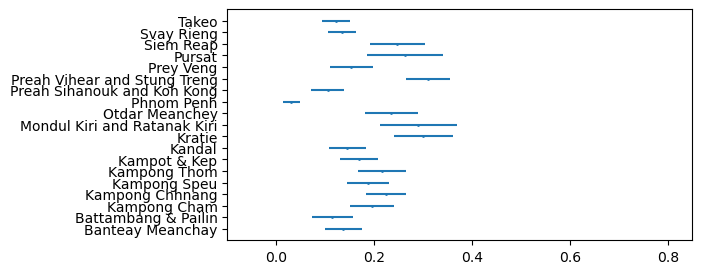

In [86]:
plt.figure(figsize=(6,3))
n_clust = rgn_df.shape[0]
plt.scatter(data=rgn_df[:n_clust], x='mpi', y='region_name', s=1)
plt.hlines(data=rgn_df[:n_clust],
           y='region_name', xmin='mpi_lo95CI', xmax='mpi_up95CI')
plt.ylim(0-1, n_clust)
plt.xlim(-0.1, 0.85)

### cluster-level MPI based on Cambodia DHS 2014

In [3]:
spatial_res = 'clust'
mpi_df = pd.read_csv(outfd_path / 'data' / f'mpi_khm_dhs14_{spatial_res}.csv')

In [4]:
mpi_df.shape

(611, 2)

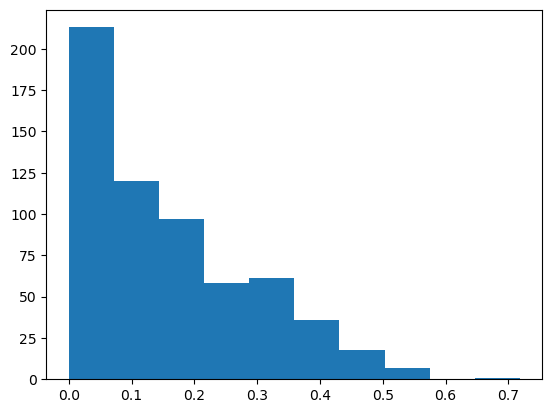

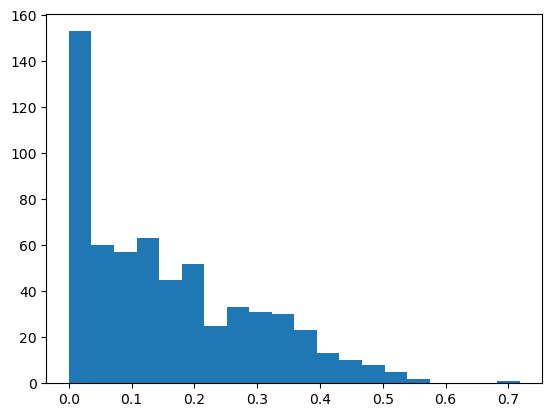

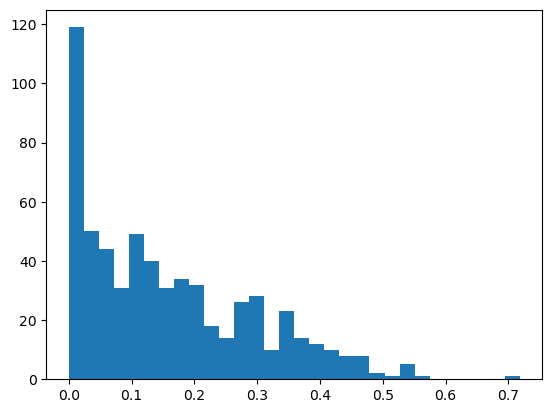

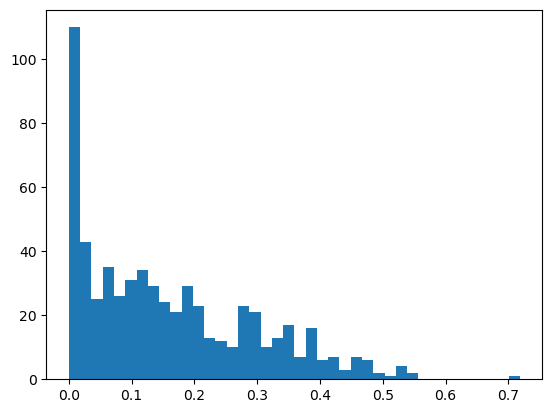

In [12]:
for n_bin in [10, 20, 30, 40]:
    plt.figure()
    plt.hist(mpi_df.mpi, bins=n_bin);

#### 0 MPI

In [8]:
mpi_df.loc[mpi_df.mpi == 0, :]  # 86 clusters have 0 MPI

,clust_no,mpi
4,5,0.0
14,15,0.0
16,17,0.0
27,28,0.0
28,29,0.0
...,...,...
587,588,0.0
591,592,0.0
593,594,0.0
594,595,0.0


In [20]:
mpi0_clusters = mpi_df.loc[mpi_df.mpi == 0, 'clust_no']
mpi0_clusters

4        5
14      15
16      17
27      28
28      29
      ... 
587    588
591    592
593    594
594    595
599    600
Name: clust_no, Length: 86, dtype: int64

##### inspect 1 cluster

In [9]:
i = 5
clust5_mpi_df = pd.read_stata(
    datafd_path / 'dta' / f'khm_dhs14_mpi_{spatial_res}{i}.dta')
clust5_mpi_df.head(2)

,hh_id,ind_id,psu,strata,subsample,weight,area,region,region_01,agec4,...,g01_k_elec_1,g01_k_toilet_1,g01_k_water_1,g01_k_house_1,g01_k_fuel_1,g01_k_asset_1,MPI_1_20,MPI_1_33,MPI_1_50,MPI_1
0,50002,5000201,5,banteay meanchey - urban,selected,0.209528,urban,Banteay Meanchay,Banteay Meanchay,18-59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,0.0,0.0,0.0
1,50002,5000202,5,banteay meanchey - urban,selected,0.209528,urban,Banteay Meanchay,Banteay Meanchay,18-59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.080808,0.0,0.0,0.0


In [12]:
clust5_mpi_df.columns.to_list()

['hh_id',
 'ind_id',
 'psu',
 'strata',
 'subsample',
 'weight',
 'area',
 'region',
 'region_01',
 'agec4',
 'agec2',
 'headship',
 'd_cm',
 'd_nutr',
 'd_satt',
 'd_educ',
 'd_elct',
 'd_wtr',
 'd_sani',
 'd_hsg',
 'd_ckfl',
 'd_asst',
 'd_cm_01',
 'd_nutr_01',
 'd_satt_01',
 'd_educ_01',
 'd_elct_01',
 'd_wtr_01',
 'd_sani_01',
 'd_hsg_01',
 'd_ckfl_01',
 'd_asst_01',
 'clust_no',
 'edu_1',
 'atten_1',
 'cm_1',
 'nutri_1',
 'elec_1',
 'toilet_1',
 'water_1',
 'house_1',
 'fuel_1',
 'asset_1',
 'sample_1',
 'per_sample_weighted_1',
 'per_sample_1',
 'g01_edu_1',
 'g01_atten_1',
 'g01_cm_1',
 'g01_nutri_1',
 'g01_elec_1',
 'g01_toilet_1',
 'g01_water_1',
 'g01_house_1',
 'g01_fuel_1',
 'g01_asset_1',
 'raw1_edu_1',
 'raw1_atten_1',
 'raw1_cm_1',
 'raw1_nutri_1',
 'raw1_elec_1',
 'raw1_toilet_1',
 'raw1_water_1',
 'raw1_house_1',
 'raw1_fuel_1',
 'raw1_asset_1',
 'w1_edu_1',
 'w1_atten_1',
 'w1_cm_1',
 'w1_nutri_1',
 'w1_elec_1',
 'w1_toilet_1',
 'w1_water_1',
 'w1_house_1',
 'w1_fuel_

In [13]:
clust5_mpi_df.shape

(66, 107)

In [14]:
clust5_mpi_df.sample_1.mean()

1.0

In [16]:
clust5_mpi_df.weight.unique()

array([0.209528])

In [18]:
clust5_mpi_df.c_vector_1.value_counts()  # no one is mpi poor

0.222222    24
0.055556    24
0.000000    18
Name: c_vector_1, dtype: int64

##### inspect all clusters

In [31]:
# check if MPI=0 simply b/c cluster has no poor ppl.
tocheck_clusters = []
for clust_no in mpi0_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    mpi_k20 = clust_mpi_df.MPI_1_20.unique()
    assert len(mpi_k20) == 1
    mpi_k20 = mpi_k20[0]
    if mpi_k20 > 0:  # MPI=0 b/c cluster has no poor ppl.
        pass
    else:  # TO CHECK: clusters have 0 mpi_k20
        # all ppl. have score < 20?
        print(f'{clust_no}: {mpi_k20}')
        tocheck_clusters.append(clust_no)

15: 0.0
72: 0.0
224: 0.0
226: 0.0
229: 0.0
230: 0.0
231: 0.0
232: 0.0
233: 0.0
236: 0.0
245: 0.0
247: 0.0
350: 0.0
381: 0.0
484: 0.0
564: 0.0
592: 0.0


In [48]:
# check clusters that have 0 mpi_k20:
# all/some ppl. used to calc. MPI, MPI=0 b/c none is poor
for clust_no in tocheck_clusters:
    clust_mpi_df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    print(clust_no)
    print(clust_mpi_df.shape[0])  # total no. of ppl.
    display(clust_mpi_df[['sample_1',  # in subsample (used)
                          'per_sample_weighted_1',  # % no missing
                          'per_sample_1',  # % no missing
                          'c_vector_1']].describe())  # score
    print()


15
81


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,81.0,81.0,81.0,81.000000
mean,1.0,1.0,1.0,0.070645
std,0.0,0.0,0.0,0.066905
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



72
57


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,57.000000,5.700000e+01,5.700000e+01,53.000000
mean,0.929825,9.298248e-01,9.298248e-01,0.013627
std,0.257713,1.804034e-07,1.804034e-07,0.024132
min,0.000000,9.298246e-01,9.298246e-01,0.000000
25%,1.000000,9.298246e-01,9.298246e-01,0.000000
50%,1.000000,9.298246e-01,9.298246e-01,0.000000
75%,1.000000,9.298246e-01,9.298246e-01,0.000000
max,1.000000,9.298246e-01,9.298246e-01,0.055556



224
60


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,60.0,60.0,60.0,60.000000
mean,1.0,1.0,1.0,0.002778
std,0.0,0.0,0.0,0.012210
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.055556



226
52


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,52.000000,5.200000e+01,5.200000e+01,46.000000
mean,0.884615,8.846156e-01,8.846156e-01,0.030193
std,0.322603,2.407447e-07,2.407447e-07,0.060526
min,0.000000,8.846154e-01,8.846154e-01,0.000000
25%,1.000000,8.846154e-01,8.846154e-01,0.000000
50%,1.000000,8.846154e-01,8.846154e-01,0.000000
75%,1.000000,8.846154e-01,8.846154e-01,0.000000
max,1.000000,8.846154e-01,8.846154e-01,0.166667



229
80


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,80.000000,8.000000e+01,8.000000e+01,73.000000
mean,0.912500,9.124993e-01,9.124993e-01,0.026636
std,0.284349,7.197684e-07,7.197684e-07,0.057905
min,0.000000,9.125000e-01,9.125000e-01,0.000000
25%,1.000000,9.125000e-01,9.125000e-01,0.000000
50%,1.000000,9.125000e-01,9.125000e-01,0.000000
75%,1.000000,9.125000e-01,9.125000e-01,0.000000
max,1.000000,9.125000e-01,9.125000e-01,0.166667



230
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.000000,6.200000e+01,6.200000e+01,54.000000
mean,0.870968,8.709678e-01,8.709678e-01,0.053498
std,0.337972,6.009122e-08,6.009122e-08,0.073166
min,0.000000,8.709677e-01,8.709677e-01,0.000000
25%,1.000000,8.709677e-01,8.709677e-01,0.000000
50%,1.000000,8.709677e-01,8.709677e-01,0.000000
75%,1.000000,8.709677e-01,8.709677e-01,0.166667
max,1.000000,8.709677e-01,8.709677e-01,0.166667



231
102


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,102.000000,1.020000e+02,1.020000e+02,100.000000
mean,0.980392,9.803924e-01,9.803924e-01,0.036111
std,0.139333,2.395960e-07,2.395960e-07,0.065294
min,0.000000,9.803922e-01,9.803922e-01,0.000000
25%,1.000000,9.803922e-01,9.803922e-01,0.000000
50%,1.000000,9.803922e-01,9.803922e-01,0.000000
75%,1.000000,9.803922e-01,9.803922e-01,0.055556
max,1.000000,9.803922e-01,9.803922e-01,0.166667



232
62


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,62.000000,6.200000e+01,6.200000e+01,51.000000
mean,0.822581,8.225811e-01,8.225811e-01,0.031590
std,0.385142,4.807297e-07,4.807297e-07,0.061116
min,0.000000,8.225806e-01,8.225806e-01,0.000000
25%,1.000000,8.225806e-01,8.225806e-01,0.000000
50%,1.000000,8.225806e-01,8.225806e-01,0.000000
75%,1.000000,8.225806e-01,8.225806e-01,0.027778
max,1.000000,8.225806e-01,8.225806e-01,0.166667



233
67


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,67.000000,67.000000,67.000000,62.000000
mean,0.925373,0.925373,0.925373,0.052867
std,0.264771,0.000000,0.000000,0.070723
min,0.000000,0.925373,0.925373,0.000000
25%,1.000000,0.925373,0.925373,0.000000
50%,1.000000,0.925373,0.925373,0.000000
75%,1.000000,0.925373,0.925373,0.138889
max,1.000000,0.925373,0.925373,0.166667



236
91


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,91.0,91.0,91.0,91.000000
mean,1.0,1.0,1.0,0.063492
std,0.0,0.0,0.0,0.076610
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



245
82


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,82.0,82.0,82.0,82.000000
mean,1.0,1.0,1.0,0.067751
std,0.0,0.0,0.0,0.068195
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



247
71


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,71.000000,7.100000e+01,7.100000e+01,63.000000
mean,0.887324,8.873245e-01,8.873245e-01,0.089947
std,0.318447,5.402599e-07,5.402599e-07,0.067989
min,0.000000,8.873239e-01,8.873239e-01,0.000000
25%,1.000000,8.873239e-01,8.873239e-01,0.055556
50%,1.000000,8.873239e-01,8.873239e-01,0.055556
75%,1.000000,8.873239e-01,8.873239e-01,0.166667
max,1.000000,8.873239e-01,8.873239e-01,0.166667



350
70


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,70.0,70.0,70.0,70.000000
mean,1.0,1.0,1.0,0.025397
std,0.0,0.0,0.0,0.058829
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.000000
max,1.0,1.0,1.0,0.166667



381
58


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,58.0,58.0,58.0,58.000000
mean,1.0,1.0,1.0,0.075671
std,0.0,0.0,0.0,0.071871
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.166667
max,1.0,1.0,1.0,0.166667



484
71


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,71.0,71.0,71.0,71.000000
mean,1.0,1.0,1.0,0.043818
std,0.0,0.0,0.0,0.067007
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667



564
75


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,75.0,75.0,75.0,75.000000
mean,1.0,1.0,1.0,0.057778
std,0.0,0.0,0.0,0.054372
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.055556
75%,1.0,1.0,1.0,0.111111
max,1.0,1.0,1.0,0.166667



592
75


,sample_1,per_sample_weighted_1,per_sample_1,c_vector_1
count,75.0,75.0,75.0,75.000000
mean,1.0,1.0,1.0,0.044444
std,0.0,0.0,0.0,0.061268
min,1.0,1.0,1.0,0.000000
25%,1.0,1.0,1.0,0.000000
50%,1.0,1.0,1.0,0.000000
75%,1.0,1.0,1.0,0.055556
max,1.0,1.0,1.0,0.166667


#### missingness

In [43]:
# confirm that per_sample_1 is just percent rows with missing values
# yes for most clusters, check the rest in the next cell
tocheck_clusters = []

for clust_no in range(1, 611+1):
    df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    assert df.subsample.unique() == ['selected']  # all in subsample
    assert len(df.per_sample_1.unique()) == 1
    assert all(df.per_sample_weighted_1 == df.per_sample_1)
    perc_nonmiss = df.per_sample_1.unique()[0]
    perc_miss = df.isna().any(axis=1).mean()
    try:
        assert abs(perc_miss + perc_nonmiss - 1) < 1e-4
    except:
        tocheck_clusters.append(clust_no)
    print(perc_miss)
    # display(clust_mpi_df.head(2))

0.14864864864864866
0.0
0.07692307692307693
0.1016949152542373
0.0
0.0
0.12903225806451613
0.03529411764705882
0.0
0.08
0.10126582278481013
0.0
0.0
0.0
0.0
0.05194805194805195
0.0
0.0
0.0
0.06493506493506493
0.0
0.0
0.0
0.13513513513513514
0.0
0.0
0.04285714285714286
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1509433962264151
0.0
0.0
0.0
0.0
0.0
0.07058823529411765
0.06557377049180328
0.0
0.1044776119402985
0.06818181818181818
0.0
0.0449438202247191
0.0
0.049019607843137254
0.0
0.06896551724137931
0.0
0.07936507936507936
0.0
0.04
0.07142857142857142
0.11666666666666667
0.08928571428571429
0.0
0.0
0.0
0.04395604395604396
0.0
0.0
0.0
0.056338028169014086
0.0
0.0
0.0
0.0
0.07017543859649122
0.0
0.0
0.0
0.0
0.09333333333333334
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.10344827586206896
0.056338028169014086
0.0
0.0
0.0
0.0
0.0
0.047619047619047616
0.0
0.0
0.1044776119402985
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.036585365853658534
0.0
0.0
0.07407407407407407
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.025


In [63]:
# turns out per_sample_1 is percent rows with missing values in 
# c_censured_vector_1_33
for clust_no in tocheck_clusters:
    df = pd.read_stata(
        datafd_path / 'dta' / 
        f'khm_dhs14_mpi_{spatial_res}{clust_no}.dta')
    perc_nonmiss = df.per_sample_1.unique()[0]
    # perc_miss = df.isna().any(axis=1).mean()
    perc_miss = df.c_censured_vector_1_33.isna().mean()
    # this perc_miss + perc_nonmiss is 1, so there are missing values
    # in other columns than c_censured_vector_1_33
    print(perc_nonmiss, perc_miss)
    print(perc_nonmiss + perc_miss)
    print()

0.9431818 0.056818181818181816
0.9999999945813959

1.0 0.0
1.0

0.8452381 0.15476190476190477
0.9999999943233672

1.0 0.0
1.0

1.0 0.0
1.0



In [64]:
# df_row_w_na = df[df.isna().any(axis=1)]
# col_w_na = df_row_w_na.isna().any(axis=0)
# df_row_w_na.loc[:, col_w_na]

In [69]:
tocheck_clusters

[46, 227, 308, 348, 353]